In [ ]:
# 1) 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 2) matplotlib에 폰트 등록 & 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 나눔고딕 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)

# 전체 폰트 설정
mpl.rc('font', family='NanumGothic')
# 음수 부호 깨짐 방지
mpl.rc('axes', unicode_minus=False)

In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

데이터 소개
- ID : 고유 ID
- 기준년월 : 데이터 기준년월
- 청구금액_R6M : 청구금액 (최근6개월간)
- 평잔_일시불_해외_6M : 평균 잔액 일시불 해외 (최근6개월)
- 잔액_일시불_B2M : 잔액 일시불 (2개월전)
- 평잔_일시불_6M : 평균 잔액 일시불 (최근6개월)
- _2순위업종_이용금액 : 최근 3개월 2순위업종 이용금액
- 최대이용금액_일시불_R12M : 최대이용금액 일시불 (최근1년간)
- 납부_기타이용금액 : 최근 3개월 납부 기타이용금액
- 쇼핑_편의점_이용금액 : 최근 3개월 쇼핑 편의점 이용금액
- _2순위교통업종_이용금액 : 최근 3개월 2순위교통업종 이용금액
- 최대이용금액_CA_R12M : 최대이용금액 현금서비스 (최근1년간)
- 교통_정비이용금액 : 최근 3개월 교통 정비이용금액
- 할부금액_무이자_3M_R12M : 최근1년 3개월 이하 무이자 할부 금액(유이자 및 부분 무이자 제외)
- 이용개월수_온라인_R6M : 이용개월수 온라인 (최근6개월간)
- 연속유실적개월수_기본_24M_카드 : 연속 카드 유실적 개월수 (최근2년간) 16  이용금액대  
- 이용카드수_신용체크 : 최근 3개월 월 평균 이용금액 구간
- _1순위카드이용건수 : 1순위 이용 카드의 이용 건수
- Segment : 고객 등급 분류 데이터

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/파이널프로젝트 파일/merged_all_train.csv')
train_df

,ID,기준년월,청구금액_R6M,평잔_일시불_해외_6M,잔액_일시불_B2M,평잔_일시불_6M,_2순위업종_이용금액,최대이용금액_일시불_R12M,납부_기타이용금액,쇼핑_편의점_이용금액,_2순위교통업종_이용금액,최대이용금액_CA_R12M,교통_정비이용금액,할부금액_무이자_3M_R12M,이용개월수_온라인_R6M,연속유실적개월수_기본_24M_카드,이용금액대,이용카드수_신용체크,_1순위카드이용건수,Segment
0,TRAIN_000000,201807,88693,0,1083,2440,1408,4906,44,0,105,11710,0,1314,1,13,01.100만원+,1,26,D
1,TRAIN_000000,201808,119419,0,736,2697,1523,5350,40,0,0,11738,0,1124,1,13,01.100만원+,1,23,D
2,TRAIN_000000,201809,132269,0,997,2735,1462,6009,44,0,0,11747,0,989,1,17,01.100만원+,1,27,D
3,TRAIN_000000,201810,92304,0,697,2562,1367,5901,48,0,0,11942,0,954,1,17,01.100만원+,1,26,D
4,TRAIN_000000,201811,97254,0,607,2431,1356,6257,44,0,0,12116,0,976,0,17,01.100만원+,1,26,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399999,201808,28912,0,0,1600,2168,5760,0,0,0,0,0,18391,0,2,03.30만원+,2,-2,E
2399996,TRAIN_399999,201809,42577,0,998,1742,2687,6233,0,0,0,0,0,18477,0,5,02.50만원+,2,-1,E
2399997,TRAIN_399999,201810,23976,0,814,1410,2447,6091,0,0,0,0,0,18640,0,5,03.30만원+,2,-2,E
2399998,TRAIN_399999,201811,26946,0,1485,993,2647,4624,0,0,0,0,0,15516,0,5,04.10만원+,2,-2,E


EDA 시작

In [ ]:
# 데이터 프레임 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 20 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ID                  object
 1   기준년월                int64 
 2   청구금액_R6M            int64 
 3   평잔_일시불_해외_6M        int64 
 4   잔액_일시불_B2M          int64 
 5   평잔_일시불_6M           int64 
 6   _2순위업종_이용금액         int64 
 7   최대이용금액_일시불_R12M     int64 
 8   납부_기타이용금액           int64 
 9   쇼핑_편의점_이용금액         int64 
 10  _2순위교통업종_이용금액       int64 
 11  최대이용금액_CA_R12M      int64 
 12  교통_정비이용금액           int64 
 13  할부금액_무이자_3M_R12M    int64 
 14  이용개월수_온라인_R6M       int64 
 15  연속유실적개월수_기본_24M_카드  int64 
 16  이용금액대               object
 17  이용카드수_신용체크          int64 
 18  _1순위카드이용건수          int64 
 19  Segment             object
dtypes: int64(17), object(3)
memory usage: 366.2+ MB


결측치 확인

In [ ]:
# 결측치 확인
train_df.isna().sum()

,0
ID,0
기준년월,0
청구금액_R6M,0
평잔_일시불_해외_6M,0
잔액_일시불_B2M,0
평잔_일시불_6M,0
_2순위업종_이용금액,0
최대이용금액_일시불_R12M,0
납부_기타이용금액,0
쇼핑_편의점_이용금액,0


Segment 분포 확인

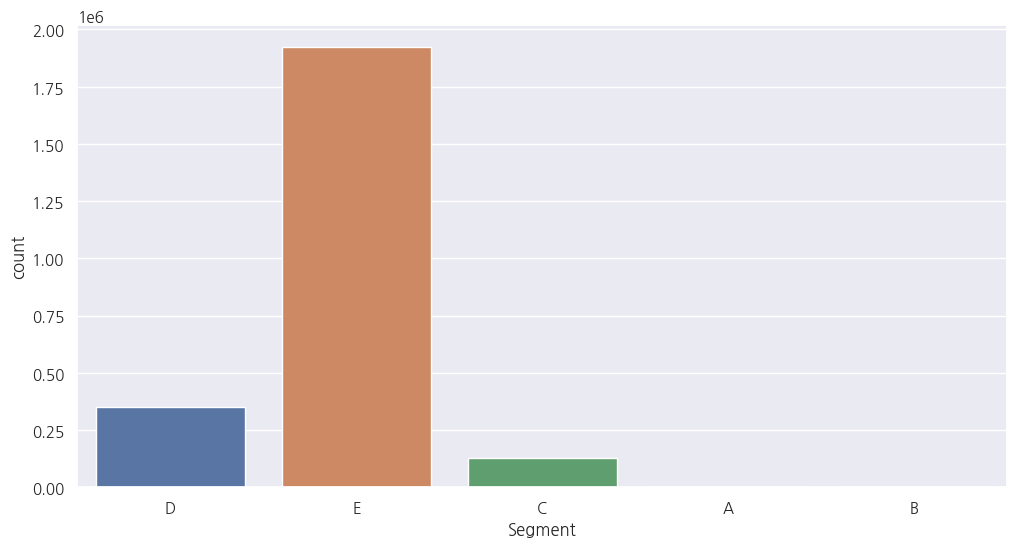

In [ ]:
# Segment분포
sns.countplot(data=train_df, x='Segment', hue='Segment')
plt.show()

,count
Segment,
E,1922052
D,349242
C,127590
A,972
B,144


<Axes: ylabel='count'>

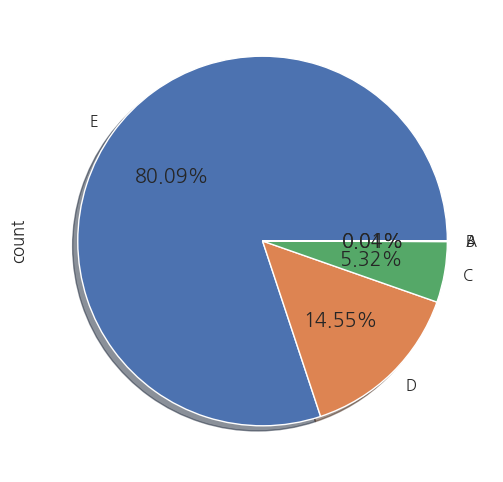

In [ ]:
# Segment 비율
display(train_df['Segment'].value_counts())

train_df['Segment'].value_counts().plot.pie(shadow=True, autopct='%.2f%%', labels=['E','D','C','A','B'])

_2순위업종_이용금액

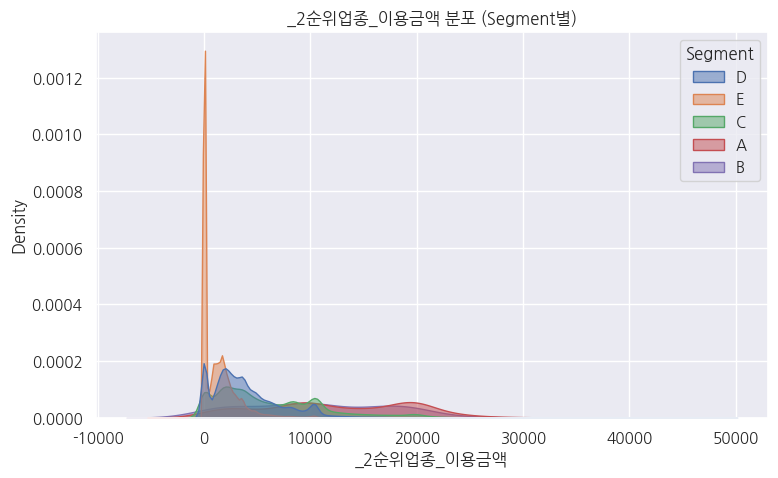

In [ ]:
# _2순위업종_이용금액의 분포
# KDE 플롯
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df,
    x='_2순위업종_이용금액',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('_2순위업종_이용금액 분포 (Segment별)')
plt.xlabel('_2순위업종_이용금액')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

- Segment 'C','D','E' 고객 : 대부분 1만원 미만 금액 이용. 'D','E' 고객은 0원 이용 최빈.
- Segment 'A','B' 고객 : 대부분 3만원 미만 금액 이용.
- 최근 3개월 이용 데이터이므로 하반기 이용금액량이 작음.


최대이용금액_일시불_R12M

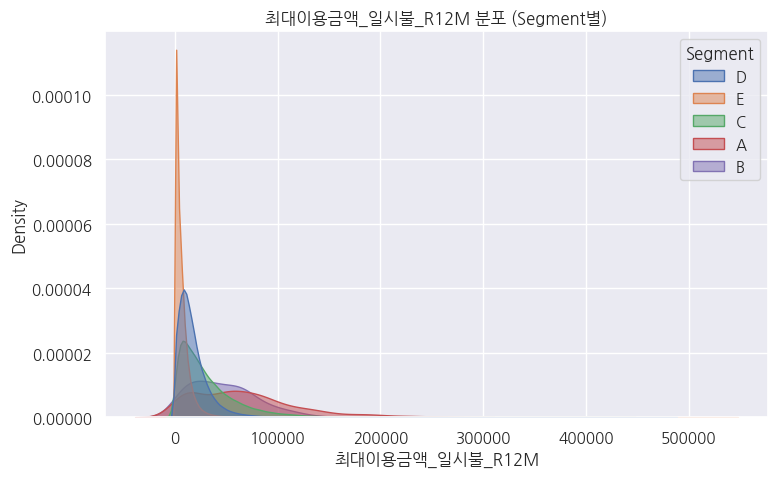

In [ ]:
# KDE 플롯 (전체 데이터)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df,
    x='최대이용금액_일시불_R12M',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('최대이용금액_일시불_R12M 분포 (Segment별)')
plt.xlabel('최대이용금액_일시불_R12M')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

납부_기타이용금액

- Segment 'C','D','E' 고객 : 대부분 10만원 미만 금액 이용.
- Segment 'A' 고객 : 대부분 25만원 미만 금액 이용.
- Segment 'B' 고객 : 대부분 15만원 미만 금액 이용.
- 50만원이 넘어가면 할부지불

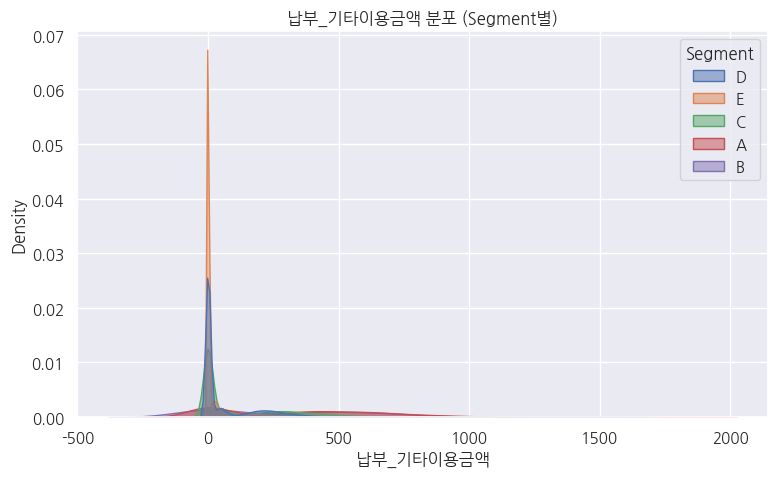

In [ ]:
# KDE 플롯 (전체 데이터)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df,
    x='납부_기타이용금액',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('납부_기타이용금액 분포 (Segment별)')
plt.xlabel('납부_기타이용금액')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

- Segment 'C','D','E' 고객 : 대부분 500원 미만 금액 이용. 0원 이용 최빈.
- Segment 'A','B' 고객 : 대부분 1000원 미만 금액 이용. 0원 이용 최빈.
- 최근3개월간 내역이므로 하반기 납부_기타이용금액이 매우 작음.

쇼핑_편의점_이용금액

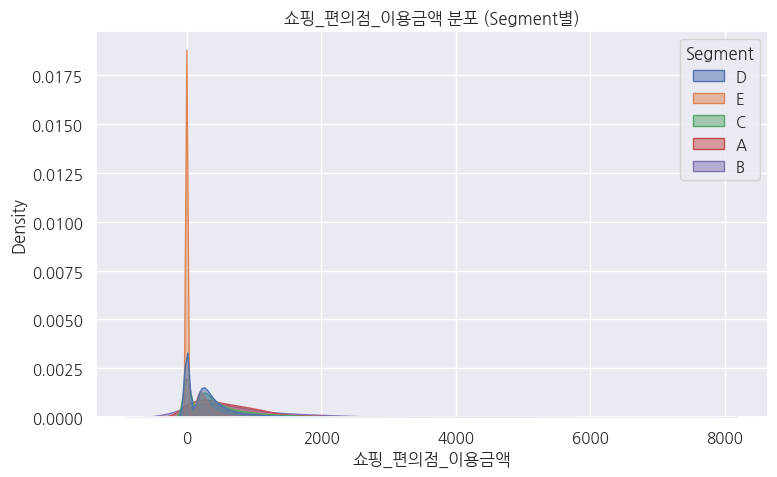

In [ ]:
# KDE 플롯 (전체 데이터)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df,
    x='쇼핑_편의점_이용금액',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('쇼핑_편의점_이용금액 분포 (Segment별)')
plt.xlabel('쇼핑_편의점_이용금액')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

- 모든 Segment 고객 : 대부분 3000원 미만 금액 이용.
- Segment 'C','D','E' 고객 : 대부분 1000원 미만 금액 이용. 0원 이용 최빈.
- 하반기 편의점 이용금액이 모두 소량

_2순위교통업종_이용금액

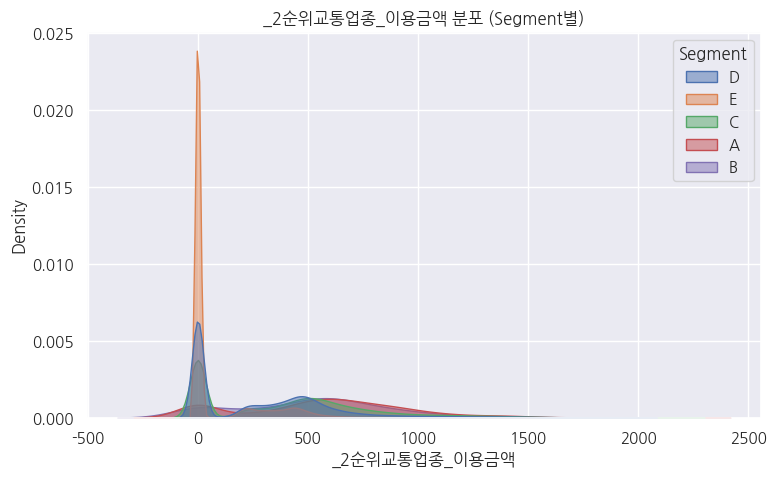

In [ ]:
# KDE 플롯 (전체 데이터)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df,
    x='_2순위교통업종_이용금액',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('_2순위교통업종_이용금액 분포 (Segment별)')
plt.xlabel('_2순위교통업종_이용금액')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

- 모든 Segment 고객 : 대부분 1700원 미만 금액 이용.
- Segment 'C','D','E' 고객 : 0원 이용 최빈.
- 하반기 _2순위교통업종_이용금액이 매우 작음.

최대이용금액_CA_R12M

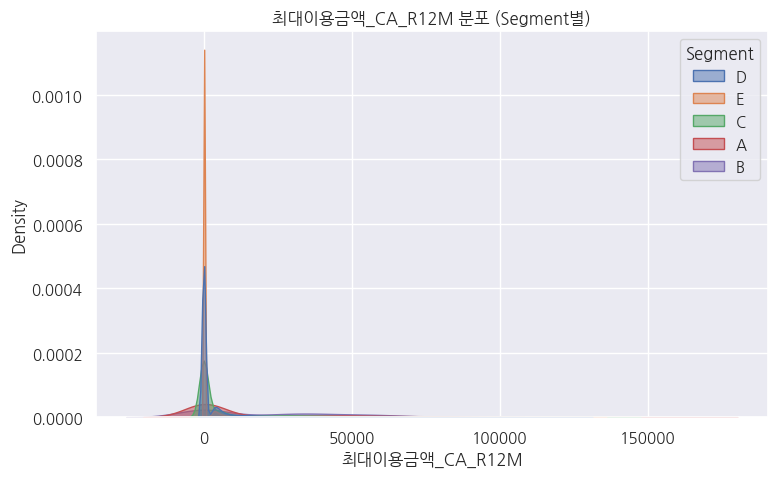

In [ ]:
# KDE 플롯 (전체 데이터)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df,
    x='최대이용금액_CA_R12M',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('최대이용금액_CA_R12M 분포 (Segment별)')
plt.xlabel('최대이용금액_CA_R12M')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

- 모든 Segment 고객 : 대부분 7.5만원 미만 금액 이용. 0원 이용 최빈
- 신용카드 현금서비스 금액은 최대 15만원 언저리로 사용하고 있음. 보통 현금서비스의 아지율과 수수료가 높으므로 금전용, 단기간용으로 소액을 인출하는 것 같음.

교통_정비이용금액

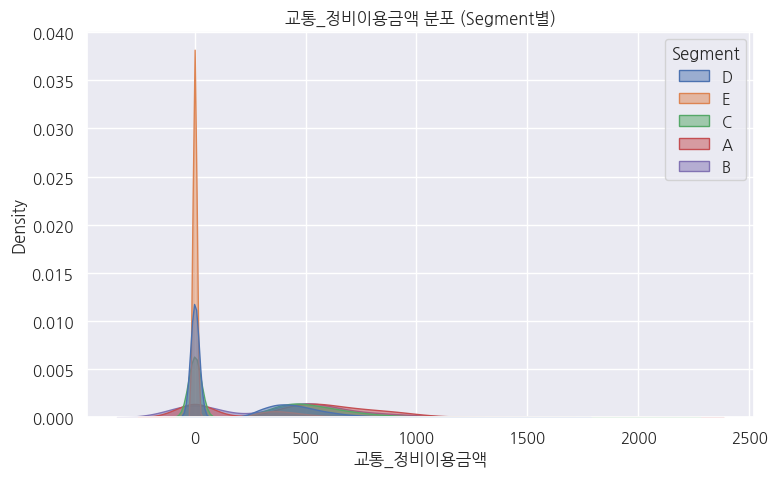

In [ ]:
# KDE 플롯 (전체 데이터)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df,
    x='교통_정비이용금액',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('교통_정비이용금액 분포 (Segment별)')
plt.xlabel('교통_정비이용금액')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

- Segment 'C','D','E' 고객 : 대부분 1000원 미만 금액 이용. 0원 이용 최빈
- Segment 'A','B' 고객 : 대부분 1200원 미만 금액 이용.
- 하반기 교통 정비금액은 소량인데 금액량이 너무 작은 걸 봐서 대부분 보험처리 했을거라 예상됨.

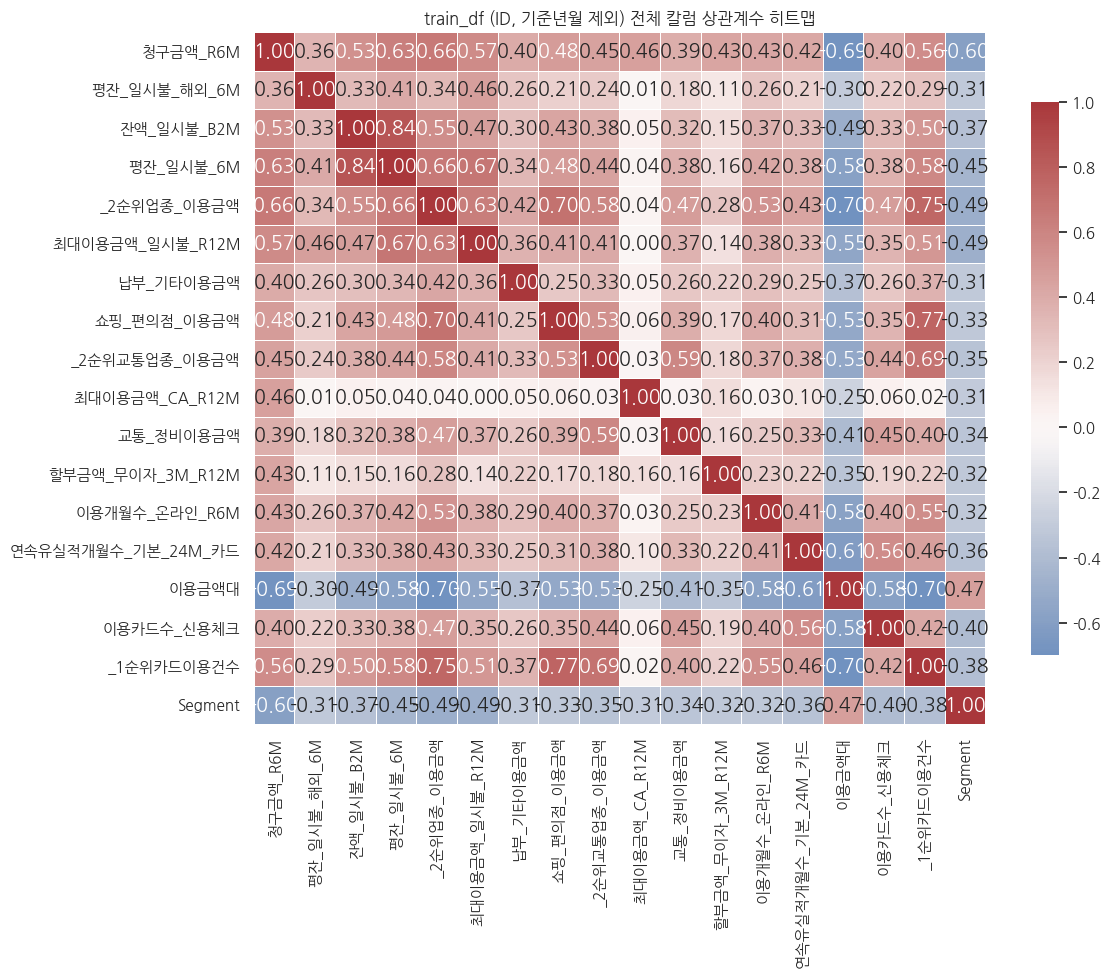

In [ ]:
# 전체 데이터 상관계수 히트맵
# 1) ID, 기준년월 제외
df = train_df.drop(['ID', '기준년월'], axis=1)

# 2) 범주형은 코드화
for col in df.select_dtypes(include=['object','category']).columns:
    df[col] = df[col].astype('category').cat.codes

# 3) 상관계수 행렬 계산
corr_mat = df.corr()

# 4) 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=True,        # 값도 보고 싶으면 True
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("train_df (ID, 기준년월 제외) 전체 칼럼 상관계수 히트맵")
plt.tight_layout()
plt.show()

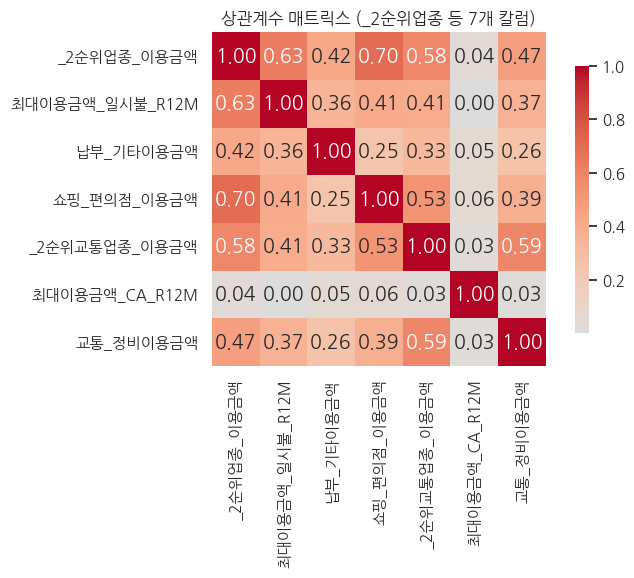

In [ ]:
#03.승인매출 정보 데이터 칼럼 상관계수 히트맵
# 1) 분석할 칼럼 리스트
cols = [
    '_2순위업종_이용금액',
    '최대이용금액_일시불_R12M',
    '납부_기타이용금액',
    '쇼핑_편의점_이용금액',
    '_2순위교통업종_이용금액',
    '최대이용금액_CA_R12M',
    '교통_정비이용금액'
]

# 2) 해당 칼럼만 추출 후 결측치 행 제거
df_sub = train_df[cols].dropna()

# 3) 상관계수 행렬 계산
corr_mat = df_sub.corr()

# 4) 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={'shrink': .8}
)
plt.title("상관계수 매트릭스 (_2순위업종 등 7개 칼럼)")
plt.tight_layout()
plt.show()